# Load the Dataset

In [2]:
import pandas as pd

# Load the full dataset
df = pd.read_csv('../data/raw/complaints.csv')
df.head()


C:\Users\addis\AppData\Local\Temp\ipykernel_28832\2068070824.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


# Basic EDA: Understand Data Structure

In [4]:
# Dataset shape and info
print(f"Shape: {df.shape}")
df.info()

# Check for missing values
df.isnull().sum()

# Sample values for key columns
df[['Product', 'Issue', 'Consumer complaint narrative']].sample(5)


Shape: (9609797, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(1

,Product,Issue,Consumer complaint narrative
2935739,Checking or savings account,Managing an account,I recently opened an account with Citi and com...
9551585,"Credit reporting, credit repair services, or o...",Incorrect information on your report,NaN
8829467,Credit reporting or other personal consumer re...,Improper use of your report,NaN
6162149,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,I have sent multiple letters to this company t...
2147945,"Credit reporting, credit repair services, or o...",Incorrect information on your report,"I submitted a letter on XX/XX/XXXX, requesting..."


# Analyze Product Distribution

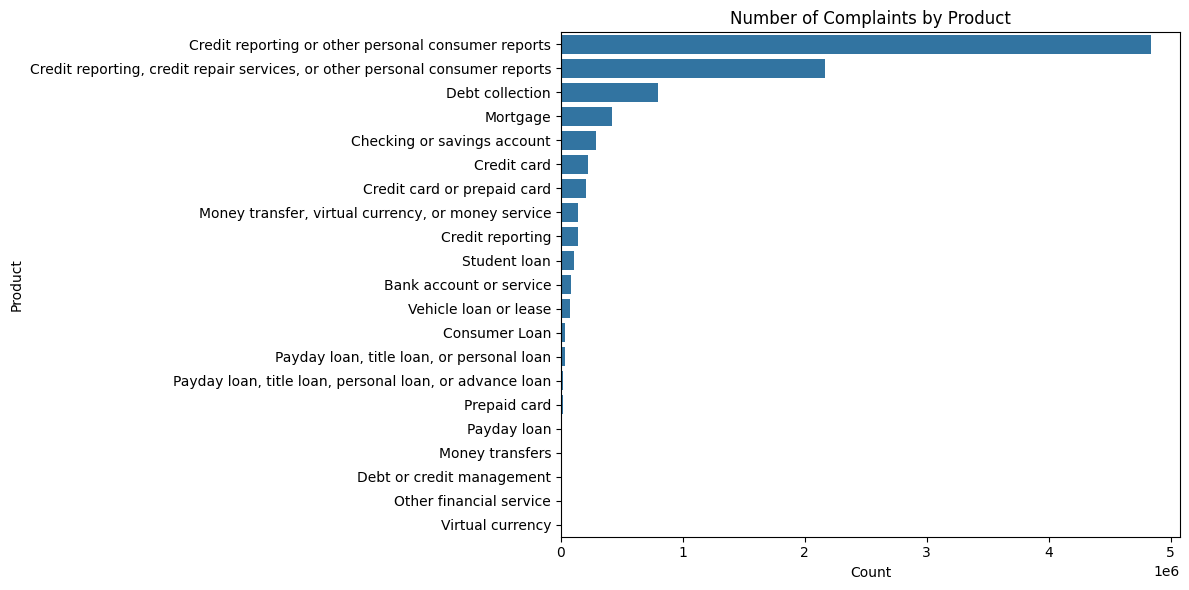

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot product counts
plt.figure(figsize=(12, 6))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index)
plt.title("Number of Complaints by Product")
plt.xlabel("Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


# Analyze Narrative Lengths

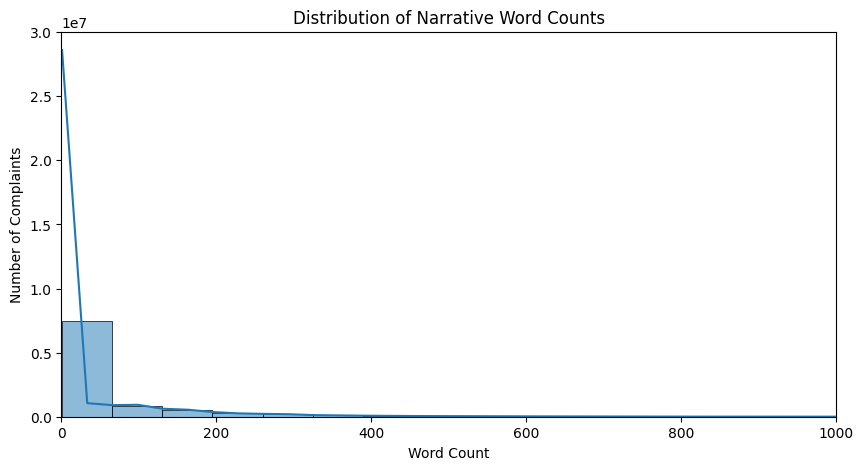

In [7]:
# Create a column with word count
df['narrative_word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

# Describe the word count distribution
df['narrative_word_count'].describe()

# Histogram of word counts
plt.figure(figsize=(10, 5))
sns.histplot(df['narrative_word_count'], bins=100, kde=True)
plt.title("Distribution of Narrative Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Number of Complaints")
plt.xlim(0, 1000)  # limit for visualization
plt.show()


# Count Complaints With and Without Narratives

In [8]:
with_narrative = df['Consumer complaint narrative'].notna().sum()
without_narrative = df['Consumer complaint narrative'].isna().sum()

print(f"Complaints with narratives: {with_narrative}")
print(f"Complaints without narratives: {without_narrative}")


Complaints with narratives: 2980756
Complaints without narratives: 6629041


# Filter to Relevant Products

In [9]:
relevant_products = [
    "Credit card", 
    "Personal loan", 
    "Buy Now, Pay Later (BNPL)", 
    "Savings account", 
    "Money transfer, virtual currency, or money service"
]

# Standardize product names to match dataset (you may have to check actual values)
df['Product'] = df['Product'].astype(str)
df_filtered = df[df['Product'].isin(relevant_products)]

# Remove rows with missing or empty narratives
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notna()]
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].str.strip() != '']

print(f"Remaining records: {df_filtered.shape[0]}")


Remaining records: 177855


# Clean Text Narratives

In [11]:
import re

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)  # collapse multiple spaces
    return text.strip()

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


# Save Cleaned Dataset

In [13]:
# Save filtered & cleaned dataset
df_filtered.to_csv('../data/filtered_complaints.csv', index=False)
